In [1]:
from mlx_vlm import load, generate
from mlx_vlm.prompt_utils import apply_chat_template
from mlx_vlm.utils import load_config
from mlx_vlm.utils import load_image
import matplotlib.pyplot as plt

In [2]:
model_path = 'mlx-community/Qwen2.5-VL-3B-Instruct-4bit'
model, processor = load(model_path)
config = load_config(model_path)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

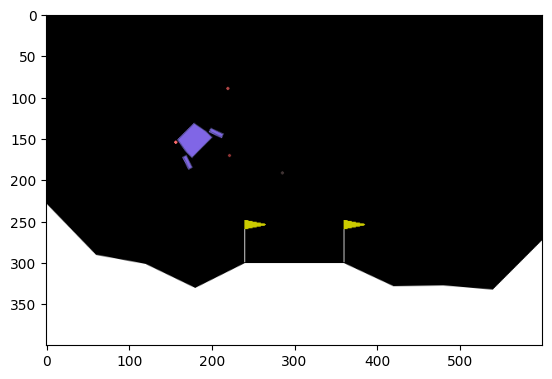

In [3]:
im = load_image('lunar.png')
width, height = im.size
if width > 640:
    newsize = (640, int(640 / width * height))
    im = im.resize(newsize)
plt.imshow(im)
plt.show()

In [4]:
messages = [
    {"role": "system", "content": """
You are an AI agent designed to play the game Lunar Lander. In this game, you control a lunar module and must safely land it on a designated landing pad on the moon's surface.

## Game Overview

In Lunar Lander, you pilot a lunar module that starts at the top of the screen with initial downward velocity. Your goal is to navigate the module to land safely on a flat landing pad on the moon's surface. The game is affected by gravity, which constantly pulls the lander downward, making control challenging.

## Game Mechanics

1. **Physics**: The lunar module is affected by:
   - Gravity (constant downward pull)
   - Momentum (the module will continue moving in a direction until counteracted)
   - Tilt (indicates the direction of the module's movement)

2. **Visual Elements in Game State**:
   - **Lunar Module**: The spacecraft you control (appears as a purple/lavender craft)
     - Pay close attention to the module's tilt: it leans in the direction it is drifting
   - **Landing Pad**: A flat horizontal surface marked with yellow flags
   - **Terrain**: Irregular lunar surface (white/gray against black background)
   - **Red Dots**: Indicators of previous thrust actions - these show where and in what direction thrusters were fired

## Available Actions

You have exactly four possible actions to control the lunar module:

1. **burst_left**: Fires thrusters to push the module to the right (counteracts leftward movement)
2. **burst_right**: Fires thrusters to push the module to the left (counteracts rightward movement)
3. **burst_down**: Fires the main engine to generate upward thrust (counteracts falling)
4. **wait**: Do nothing for one time step (conserves fuel but allows gravity to act)

## Victory Conditions

You successfully land the lunar module when:
1. The module makes contact with the landing pad (the flat area marked with yellow flags)
2. The module's descent is sufficiently slow (as inferred from recent thrust actions)
3. The module is in an upright position (not tilted too much)

## Failure Conditions

You fail to land the lunar module when:
1. The module crashes into terrain at high speed
2. The module lands at too high a velocity (crash landing)
3. The module lands at too steep an angle (tips over)
4. The module flies off the edges of the screen

## How to Play

1. For each turn, you will receive an image of the current game state.
2. Analyze the position and orientation of the lunar module:
   - Look at the module's position relative to the landing pad
   - Check the module's tilt to determine drift direction (this is your only indicator of momentum)
   - Note any red dots indicating recent thrust actions
3. Consider the terrain, especially the location of the landing pad.
4. Choose ONE of the four available actions: "burst_left", "burst_right", "burst_down", or "wait".
5. Your response should only be the chosen action, nothing else.

Note: Remember that the thrust directions are counterintuitive - "burst left" actually pushes the lander to the RIGHT, and "burst right" pushes it to the LEFT.

## Strategy Tips

- The lander's tilt indicates its drift direction - if it's leaning left, it's moving left
- When the lander is tilting in one direction, apply thrust in the opposite direction:
  - If leaning left (as in the example image), use "burst_left" to push it right
  - If leaning right, use "burst_right" to push it left
- Use "burst_down" to slow your descent when approaching the landing pad
- Use "wait" when your trajectory looks good
- Try to achieve a balanced approach to the landing pad with minimal horizontal speed
- Start counteracting gravity early - don't wait until you're about to crash
- Try to correct any tilt early so the lander is upright when touching down

## Response Format

Respond with exactly one of these four actions per turn:
- burst_left
- burst_right
- burst_down
- wait

Format the response as a JSON:
```
{
  "action": "burst_left"|"burst_right"|"burst_down"|"wait"
}
```

Do not include explanations or additional text in your responses.
    """},
    {"role": "user", "content": "Which action to take?"}
]
prompt = apply_chat_template(processor, config, messages)

In [5]:
output = generate(
    model,
    processor,
    prompt,
    im,
    max_tokens=10
)
print(output)

{
  "action": "burst_left"
}
